## 1. Read images and save data for training 

Author: Gayathri Nadar, SCF MPI-CBG </br>
Date: 2021-09-24 </br>
For: Rudrarup </br>
Lab: Tang </br> 

### About 
- This notebook is a part of 3 notebooks in sequence:
    * 1_read_images
    * 2_train_save_classifier 
    * 3_do_prediction 
- This notebook **reads images from file paths specified in text files and populates a numpy array.**
- **Label arrays are also created** for the training data. 
- **The training data and the labels are saved in the form of numpy arrays** for fast loading in the next step. 


### Preparations
Data:

- **Prepare 3 text files such that it contains path of images of the 3 classes**
    - empty 
    - droplets
    - non-droplets
- **Save them locally in a single folder. This folder should contain only these 3 text files.** 
- **The 3 files should have file names that contain the keywords `Empty`, `Droplet`, `Non-droplet`** respectively. For e.g. `Empty_paths.txt`. No spaces in filenames!
- **Mount the server space `tanglab-tds` on your laptop** before running this notebook. 

Python:

- **Keep this jupyter notebook and `functions.py` together!**
- Set up python and jupyter, and conda env. Check document 'Readme_Python_installation'.
- **When you open this notebook. Click on Kernel > Change kernal and change it to 'imageclassification'**

### General Jupyter Notebook Usage: The basics
- The notebook is executed cell-by-cell.
- The active/current cell is visible by being surrounded by a blue or green box.
- Green box: edit mode. Blue box: view mode. To exit the edit mode: press Esc
- To run a cell: Press Shift+Enter (runs the cell and automatically advances to the next cell)
- Auto-complete is supported (convenient when you e.g. type a folder location): start typing, then press Tab key.
- When you are completely finished: Click on Kernel->Shutdown and close all notebooks related tabs.
- **If you want to do a fresh start of the analysis: click on Kernel -> Restart and Clear Output**. Do this if your notebook seems to have hung. 

### Usage of this notebook:
- Start at the top.
- Run cells step-by-step.
- For cells titled **\"User Input\"**. Adjust the content (data folder etc.) before running them.
- Note: if you accidentally ran it already, simply click on it, adjust the content, and run it again.

### Current workflow 
User Input:

- Folder containing the 3 text files. 
- Number of images to be used for training. 

Steps:

- The text files are read from the folder and added to a list. 
- From each text file, image paths are read and added to another list. 
- Next images from the path and opened and added to a numpy array. 
- N random images are chosen for training where N is set by user. 
- Array with labels `droplet`, `empty`, `aggregates` are created automatically. 
- The images and labels are saved as numpy arrays in folder `training_data` in same folder containing text files (specified by user)


### Output 
Found in the folder `training_data`
- 1 numpy array of images from each of the 3 classes 
- 1 numpy array of labels for each class

    
    

### Prep: Always run this cell

In [2]:
import numpy as np 
import os
from os.path import join
import matplotlib.pyplot as plt
import cv2
import tifffile 
import random
from functions import * 

### User Input 
Enter the path to the folder which contains text files with paths to images. 

In [3]:
# enter values here 
path_to_txt_files = "../data/"

# nothing to do here
savepath = join(path_to_txt_files, "training_data")
if not os.path.exists(savepath):
    os.makedirs(savepath)
seed = 5

### Finding text file corresponding to each class 

In [4]:
txtfiles = [f for f in os.listdir(path_to_txt_files) if os.path.isfile(join(path_to_txt_files,f)) and f.endswith(".txt")]
print("Found text files in folder =", txtfiles, "\n")

# file with specified keywords 
emptysample_file = getFilename(txtfiles, "Empty")
dropletssample_file = getFilename(txtfiles, "Droplet")
aggregatessample_file = getFilename(txtfiles, "Non-droplet")

print("Found text files =", emptysample_file, dropletssample_file, aggregatessample_file)

Found text files in folder = ['Empty_with_path.txt', 'Non-droplet_with_path.txt', 'Droplet_with_path.txt'] 

Found text files = Empty_with_path.txt Droplet_with_path.txt Non-droplet_with_path.txt


### Getting paths from the text files

In [5]:
if emptysample_file is not None:
    empty = getListofPathsFromTxtFile(join(path_to_txt_files, emptysample_file))

if dropletssample_file is not None:
    droplets = getListofPathsFromTxtFile(join(path_to_txt_files, dropletssample_file))
    
if aggregatessample_file is not None:
    non_droplets = getListofPathsFromTxtFile(join(path_to_txt_files, aggregatessample_file))

print("We have {} empty samples, {} non-droplet samples and, {} droplet samples".format(len(empty), len(non_droplets), len(droplets)))

Done reading paths from text file:  Empty_with_path.txt
Done reading paths from text file:  Droplet_with_path.txt
Done reading paths from text file:  Non-droplet_with_path.txt
We have 179 empty samples, 667 non-droplet samples and, 1087 droplet samples


### User Input 

Enter the number of samples to be used for training - make sure this is less than the available images!

In [6]:
no_samples = 150

### Selecting N samples for training from the read paths

In [7]:
# pick N images from each set 
empty_samples = getNSamples(empty, no_samples = no_samples, seed=seed)
droplet_samples = getNSamples(droplets, no_samples = no_samples, seed=seed)
non_droplets_samples = getNSamples(non_droplets, no_samples = no_samples, seed=seed)

print("Sample path =", empty_samples[0])

Sample path = /Volumes/tanglab-tds/Rudrarup_Coarcevates/yokogawa/201029_Anju_peptides/004RB201029A-Anju-ADP-ATP-00h_20201029_120429/004RB201029A-Anju-ADP-ATP-00h/004RB201029A-Anju-ADP-ATP-00h_A02.c3_T0001F001L01A02Z04C01.tif


### Read N chosen images 

In [8]:
print("Class: Empty")
empty_images = readImagesfromPathsListandResize(empty_samples, downsize=True, newsize=(512, 512))

print("Class: Droplet")
droplets_images = readImagesfromPathsListandResize(droplet_samples, downsize=True, newsize=(512, 512))

print("Class: Non-droplet")
non_droplets_images = readImagesfromPathsListandResize(non_droplets_samples, downsize=True, newsize=(512, 512))

Class: Empty
Starting to read images in list. This might take time...
Reading files - done!

Class: Droplet
Starting to read images in list. This might take time...
Reading files - done!

Class: Non-droplet
Starting to read images in list. This might take time...
Reading files - done!



In [9]:
print("Shape of training images array from each class (no samples, X, Y) = ", empty_images.shape)

Shape of training images array from each class (no samples, X, Y) =  (150, 512, 512)


### User Input: display some images 

- **Change the value of `array_to_show` to either `empty_images`, `droplets_images`, `non_droplets_images`** based on which class of images you want to view. 
- An index will be picked randomly and image at that index from the selected array will be displayed

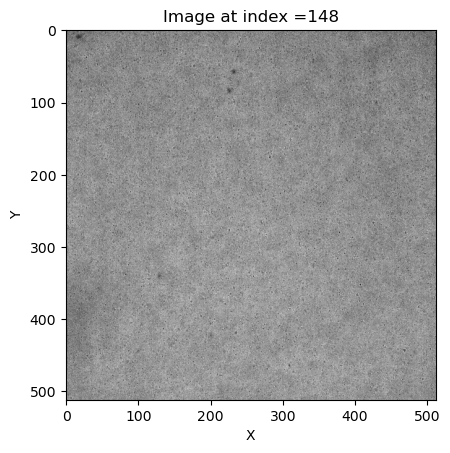

In [42]:
# change value here
array_to_show = droplets_images

# nothing to do here
idx = random.randint(0, len(array_to_show) - 1)
plt.imshow(array_to_show[idx], cmap='gray')
plt.title("Image at index =" + str(idx))
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Creating labels for the images - GT 
- 3 arrays of size (N, 1) where N = no of samples

In [43]:
labels_empty = createLabelsArray(no_samples, 'empty')
labels_droplets = createLabelsArray(no_samples, 'droplet')
labels_aggregates = createLabelsArray(no_samples, 'aggregates')

print("Shape of labels array (no samples,) =", labels_empty.shape)

Shape of labels array (no samples,) = (150,)


### Saving training data 

In [44]:
train_images = np.vstack((empty_images, droplets_images, non_droplets_images))
train_labels = np.hstack((labels_empty, labels_droplets, labels_aggregates))

print("Shape of the merged array of all training images", train_images.shape)
print("Shape of the labels for all training images", train_labels.shape)

np.save(join(savepath, "training_images_150"), train_images)
np.save(join(savepath, "training_labels_150"), train_labels)

Shape of the merged array of all training images (450, 512, 512)
Shape of the labels for all training images (450,)
